In [42]:
from collections import defaultdict
import time
import sys
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import community 
import operator

# flush print
def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % d)
    sys.stdout.flush()

In [43]:
graph_dict = {}
with open('/Users/ditong/Documents/skillProject/description/data/SOC/skillpair_pmi.txt', 'r') as f:
    for line in f:
        line_lst = line.split("\t")
        graph_dict[(int(line_lst[0]), int(line_lst[1]))] = float(line_lst[2])

In [44]:
len(graph_dict)

9567543

In [45]:
with open('/Users/ditong/Documents/skillProject/description/data/SOC/2010_skill_id_name.json','r')as f:
    name_dict = json.load(f)
name_index = {name_dict[i]:int(i) for i in name_dict}
name_dict = {int(i):name_dict[i] for i in name_dict.keys()}

In [46]:
PMI = nx.Graph()
for pair in graph_dict:
    if graph_dict[pair] > 0:
        i, j = pair
        PMI.add_edge(name_dict[i], name_dict[j], weight = graph_dict[pair])
    
len(PMI),len(PMI.edges)

(10296, 4779008)

In [47]:
pw={(i,j):PMI[i][j]['weight'] for i,j in PMI.edges()}

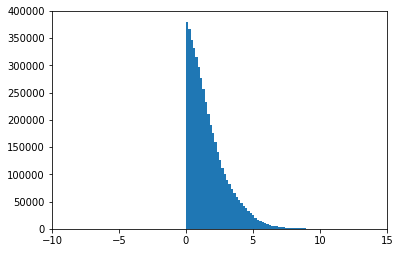

In [48]:
plt.hist(list(pw.values()),80)
plt.xlim(-10,15)
plt.show()

In [124]:
spw=sorted(pw.items(),key=lambda x:-x[1])

In [70]:
ppmi = defaultdict(lambda:defaultdict(lambda:0))
for i,j in pw:
    ppmi[i][j] = pw[(i,j)]

In [71]:
spmi = defaultdict(lambda:[])
for i in ppmi:
    sl = sorted([(p,j) for j, p in ppmi[i].items()],reverse=True)
    sj = [j for p, j in sl]
    spmi[i] = sj

In [125]:
list(spw)[:10]

[(('bedding industry knowledge', 'tumblr'), 14.123580621343368),
 (('corelocation', 'mapkit'), 14.106486187984068),
 (('herbicide sprayers', 'flail mowers'), 13.994368889863361),
 (('insulin-dependent diabetes', 'alternative fuel vehicles'),
  13.578853445901697),
 (('insulin-dependent diabetes', 'public transportation system'),
  13.578853445901697),
 (('public transportation system', 'alternative fuel vehicles'),
  13.578853445901697),
 (('genetic algorithms', 'aquafarming industry knowledge'),
  13.549294643660152),
 (('cable winches', 'logging arches'), 13.21460473184562),
 (('cable winches', 'hoisting racks'), 13.21460473184562),
 (('hoisting racks', 'logging arches'), 13.21460473184562)]

In [132]:
sorted([(v['weight'],k) for k,v in PMI['sql'].items()],reverse=True)[:5]

[(1.990928575219617, 'universal disk format (udf)'),
 (1.990928575219617, 'statspack'),
 (1.990928575219617, 'shareplex'),
 (1.990928575219617, 'peoplesoft internet architecture'),
 (1.990928575219617, 'oracle exadata')]

In [60]:
partition = community.best_partition(PMI)

In [9]:
partition = {}
with open('/Users/ditong/Documents/skillProject/description/data/SOC/partition_0.0_0.0_6_0.51.txt','r') as f:
    for line in f:
        skill = line.split('\t')[0]
        group = int(line.split('\t')[1])
        partition[skill] = group

In [61]:
community.modularity(partition, PMI)

0.5110323275586994

In [10]:
set(list(partition.values()))

{0, 1, 2, 3, 4, 5}

In [49]:
dcentralities = nx.degree_centrality(PMI)

In [139]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[:10]

[('research', 0.5113161728994657),
 ('oral communication', 0.46799417192812043),
 ('writing', 0.46372025254978144),
 ('planning', 0.45643516270033996),
 ('preparing reports', 0.4500242836328314),
 ('technical assistance', 0.4463331714424478),
 ('written communication', 0.440990772219524),
 ('technical writing / editing', 0.4359397765905779),
 ('microsoft office', 0.4355512384652744),
 ('data collection', 0.4322486644001942)]

In [140]:
sorted(dcentralities.items(), key = lambda x: x[1], reverse = True)[-10:]

[('freight car repairs', 0.001942690626517727),
 ('bike repair', 0.0018455560951918407),
 ('dental needs evaluation', 0.0017484215638659541),
 ('alveolar', 0.0016512870325400678),
 ('stroke delimbers', 0.0016512870325400678),
 ('backing maneuvers', 0.0015541525012141815),
 ('dog guides', 0.001165614375910636),
 ('speed lathes', 0.001165614375910636),
 ('temporomandibular disorders', 0.001165614375910636),
 ('loose insulation', 0.0010684798445847498)]

In [161]:
type(dcentralities)

dict

In [51]:
gs = defaultdict(lambda:[])
for s in partition:
    gs[partition[s]].append(s)

In [52]:
gsd = defaultdict(lambda:defaultdict(lambda:'na'))
for s in partition:
    gsd[partition[s]][s] = dcentralities[s]

In [53]:
for g in gsd:
    gsd[g] = dict(sorted(gsd[g].items(), key=operator.itemgetter(1), reverse=True))

In [63]:
list(gsd[0].keys())[:300]

['writing',
 'microsoft powerpoint',
 'presentation skills',
 'product development',
 'proposal writing',
 'teamwork / collaboration',
 'training materials',
 'thought leadership',
 'preparing proposals',
 'creative problem solving',
 'meeting deadlines',
 'materials development',
 'building effective relationships',
 'strategic planning',
 'program implementation',
 'business communications',
 'self-starter',
 'stakeholder management',
 'creativity',
 'public speaking',
 'facebook',
 'professional services marketing',
 'health care industry knowledge',
 'basic internet skills',
 'request for proposal (rfp)',
 'business case analysis',
 'business strategy',
 'traffic management',
 'strategic development',
 'digital video',
 'people management',
 'budget management',
 'strategic thinking',
 'chinese',
 'time management',
 'focus groups',
 'team management',
 'economic development',
 'multimedia',
 'online research',
 'business acumen',
 'effective communications',
 'editing',
 'strategi

In [64]:
list(gsd[1].keys())[:300]

['technical assistance',
 'project management',
 'mentoring',
 'troubleshooting',
 'simulation',
 'occupational health and safety',
 'legal compliance',
 'technical training',
 'calculation',
 'siemens nixdorf hardware',
 'root cause analysis',
 'data acquisition',
 'process design',
 'technical services marketing',
 'calibration',
 'resource management',
 'product testing',
 'feasibility studies',
 'robotics',
 'packaging',
 'industrial engineering industry expertise',
 'quality management',
 'medical equipment industry knowledge',
 'renewable energy',
 'global positioning system (gps)',
 'satisfaction failure correction',
 'natural gas',
 'product improvement',
 'equipment maintenance',
 'engineering documentation',
 'cost estimation',
 'project design',
 'hazardous waste',
 'engineering technical support',
 'local government',
 'test equipment',
 'scada',
 'new product development',
 'engineering support',
 'environmental health and safety',
 'environmental laws and regulations',
 '

In [65]:
list(gsd[2].keys())[:300]

['technical writing / editing',
 'project planning and development skills',
 'technical support',
 'procedure development',
 'surveillance',
 'troubleshooting technical issues',
 'policy development',
 'database management',
 'requirements verification and validation',
 'risk and mitigation analysis',
 'data mining',
 'technical analysis',
 'lotus applications',
 'lotus notes',
 'problem identification',
 'system design',
 'sap',
 'microsoft project',
 'microsoft visio',
 'document management',
 'information systems',
 'change management',
 'telecommunications',
 'knowledge management',
 'reengineering',
 'hardware experience',
 'arcgis',
 'system implementation',
 'systems integration',
 'geographic information system (gis)',
 'prototyping',
 'data quality',
 'performance analytics',
 'information technology industry knowledge',
 'level design',
 'systems engineering',
 'lifecycle management',
 'problem analysis',
 'macros',
 'configuration management',
 'business solutions',
 'busine

In [66]:
list(gsd[3].keys())[:300]

['planning',
 'preparing reports',
 'written communication',
 'microsoft office',
 'microsoft word',
 'spreadsheets',
 'problem solving',
 'microsoft access',
 'communication skills',
 'word processing',
 'analytical skills',
 'computer literacy',
 'organizational skills',
 'microsoft excel',
 'verbal / oral communication',
 'benchmarking',
 'detail-oriented',
 'budgeting',
 'decision making',
 'outsourcing',
 'prioritizing tasks',
 'staff management',
 'economics',
 'process improvement',
 'asset management industry knowledge',
 'business operations',
 'agency selection',
 'statistical reporting',
 'vendor relations',
 'contract review',
 'public administration',
 'policy implementation',
 'contract preparation',
 'scheduling',
 'conflict management',
 'database software',
 'enterprise resource planning (erp)',
 'leadership',
 'business administration',
 'cost analysis',
 'contractor industry knowledge',
 'key performance indicators (kpis)',
 'due diligence',
 'request for information

In [67]:
list(gsd[4].keys())[:300]

['research',
 'oral communication',
 'data collection',
 'quality assurance and control',
 'data analysis',
 'physics',
 'biotechnology',
 'prepare presentations',
 'data management',
 'statistical analysis',
 'report writing',
 'statistics',
 'surveys',
 'chemistry',
 'progress reports',
 'matlab',
 'good manufacturing practices (gmp)',
 'pharmaceutical industry knowledge',
 'sas',
 'cancer knowledge',
 'vaccines',
 'current good manufacturing practices (cgmp)',
 'decision support',
 'laboratory testing',
 'quantitative analysis',
 'biology',
 'microscope',
 'image processing',
 'experiments',
 'following sops',
 'fortran',
 'clinical research',
 'sample collection',
 'grant writing',
 'chemical engineering',
 'laboratory equipment',
 'epidemiology',
 'biologics',
 'site and study management',
 'biomedical engineering',
 'program evaluation',
 'drug development',
 'environmental science',
 'genetics',
 'clinical trials',
 'product research',
 'remote sensing',
 'statistical methods',


In [68]:
list(gsd[5].keys())[:300]

['personnel management',
 'record keeping',
 'public health and safety',
 'peer review',
 'personal protective equipment (ppe)',
 'physiology',
 'program development',
 'spanish',
 'health insurance portability and accountability act (hipaa)',
 'educational programs',
 'english',
 'infectious disease',
 'training programs',
 'psychology',
 'bilingual',
 'stress testing',
 'anatomy',
 'critical thinking',
 'program planning',
 'listening',
 'teaching',
 'medical terminology',
 'managed care',
 'medical coding',
 'clinical experience',
 'oncology',
 'pathology',
 'healthcare information',
 'x-rays',
 'patient safety',
 'infection control',
 'diabetes diagnosis / treatment',
 'interaction with patients / medical personnel',
 'educational materials',
 'cardiopulmonary resuscitation (cpr)',
 'patient contact',
 'surgery',
 'patient care',
 'medical imaging',
 'faculty training',
 'continuous quality improvement',
 'medical assistance',
 'hipaa compliance',
 'aseptic technique',
 'sterile pr

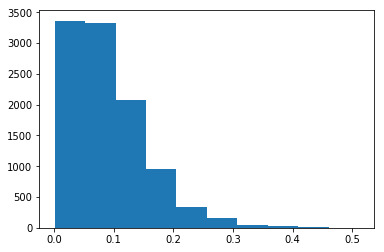

In [145]:
plt.hist(list(dcentralities.values()))
plt.show()

In [54]:
G = PMI.copy()
index = nx.degree_centrality(PMI)
sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
value_of_rule = np.min([800, len(G.nodes)])

nodes_remain = {}
for word, centr in sorted_index[:value_of_rule]:
    nodes_remain[word] = centr
G.remove_nodes_from([n for n in index if n not in nodes_remain])
print ("Total number of nodes(after filtering) in the graph is %s" % len(G))

Total number of nodes(after filtering) in the graph is 800


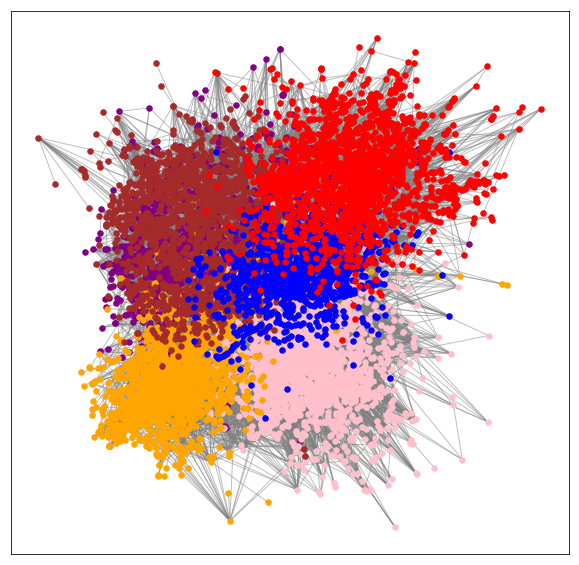

In [72]:
colors = ['purple', 'pink', 'orange', 'brown', 'blue', 'red']
size = float(len(set(partition.values())))
pos = nx.spring_layout(PMI, iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com and nodes in list(PMI.nodes)]
    
    nx.draw_networkx_nodes(PMI, pos, list_nodes, node_size = 30, labels = {n: n for n in list_nodes},
                                node_color = colors[count-1])

edgelist = [edges for edges in list(PMI.edges()) if edges[1] == spmi[edges[0]][0]]    
nx.draw_networkx_edges(PMI, pos, edgelist, alpha=0.5, edge_color='grey')

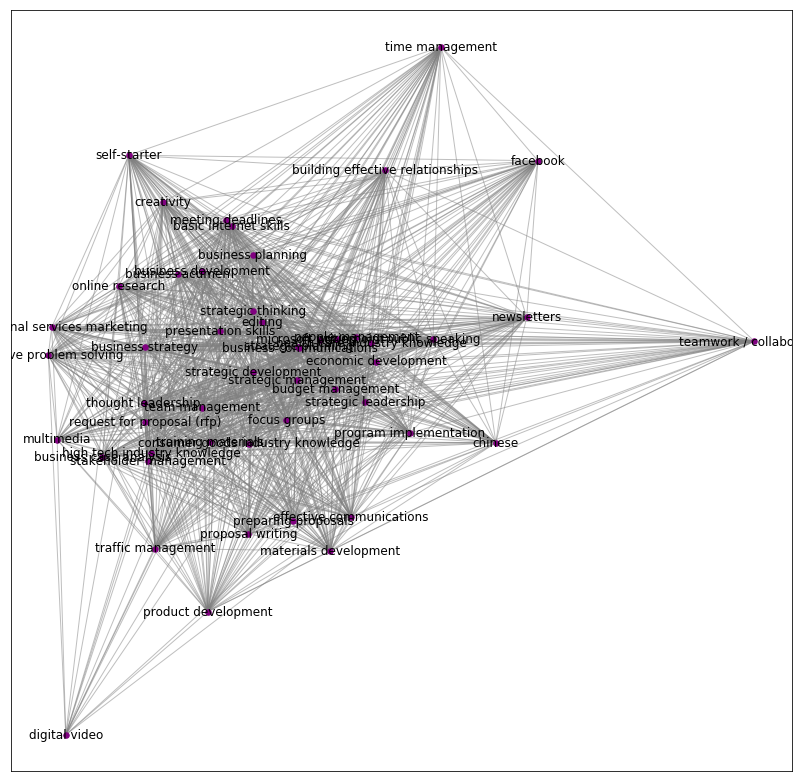

In [55]:
colors = ['purple', 'pink', 'orange', 'brown', 'blue', 'red']
size = float(len(set(partition.values())))
pos = nx.spring_layout(G, iterations= 100)
fig, ax = plt.subplots(figsize = (14,14))
list_nodes = [nodes for nodes in partition.keys()
                            if partition[nodes] == 0 and nodes in list(G.nodes) and nodes in list(gsd[0].keys())[:50]]
edgelist = [edges for edges in list(G.edges())
                            if partition[edges[0]] == 0 and partition[edges[1]] == 0 
                            and edges[0] in list_nodes and edges[1] in list_nodes]
nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30, node_color = colors[0])
nx.draw_networkx_labels(G,pos, {n: n for n in list_nodes}, font_size=12)

nx.draw_networkx_edges(G, pos, edgelist, alpha=0.5, edge_color='grey')

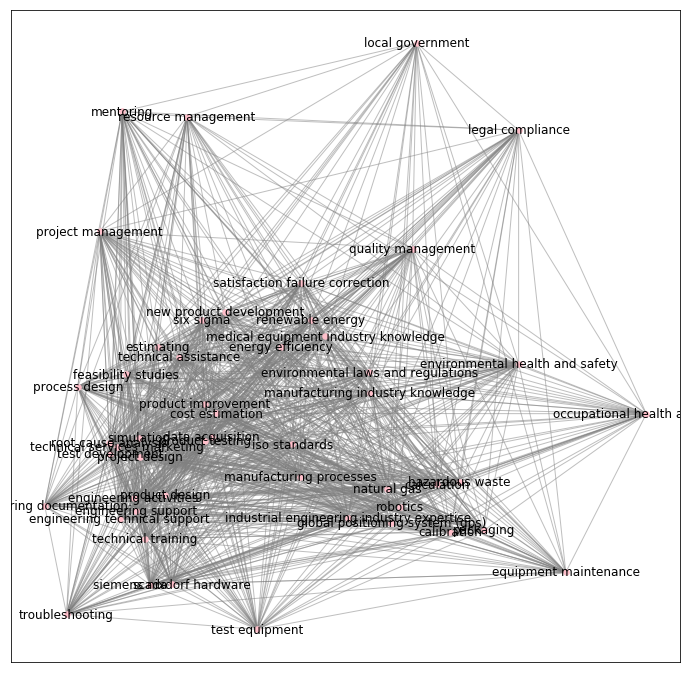

In [56]:
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G, iterations= 100)
fig, ax = plt.subplots(figsize = (12,12))
list_nodes = [nodes for nodes in partition.keys()
                            if partition[nodes] == 1 and nodes in list(G.nodes) and nodes in list(gsd[1].keys())[:50]]
edgelist = [edges for edges in list(G.edges())
                            if partition[edges[0]] == 1 and partition[edges[1]] == 1
                            and edges[0] in list_nodes and edges[1] in list_nodes]
nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30, node_color = colors[1])
nx.draw_networkx_labels(G,pos, {n: n for n in list_nodes}, font_size=12)

nx.draw_networkx_edges(G, pos, edgelist, alpha=0.5, edge_color='grey')

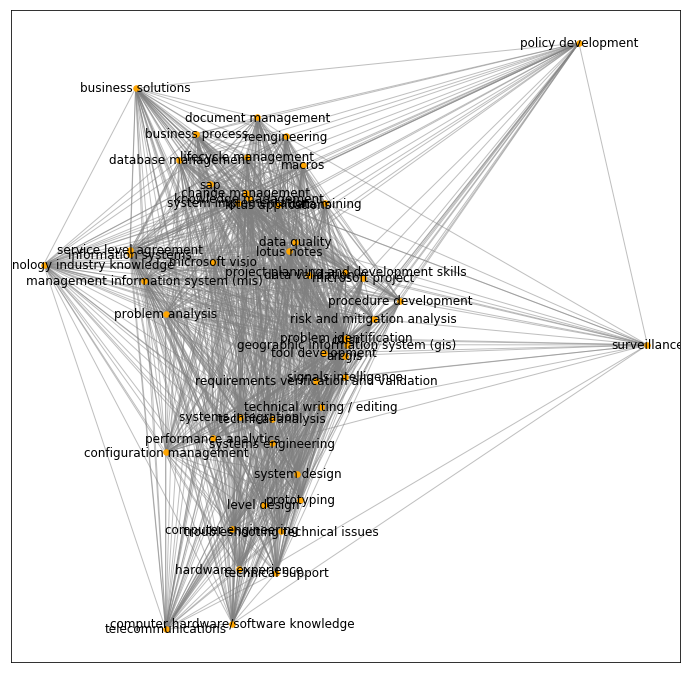

In [57]:
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G, iterations= 100)
fig, ax = plt.subplots(figsize = (12,12))
list_nodes = [nodes for nodes in partition.keys()
                            if partition[nodes] == 2 and nodes in list(G.nodes) and nodes in list(gsd[2].keys())[:50]]
edgelist = [edges for edges in list(G.edges())
                            if partition[edges[0]] == 2 and partition[edges[1]] == 2
                            and edges[0] in list_nodes and edges[1] in list_nodes]
nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30, node_color = colors[2])
nx.draw_networkx_labels(G,pos, {n: n for n in list_nodes}, font_size=12)
nx.draw_networkx_edges(G, pos, edgelist, alpha=0.5, edge_color='grey')

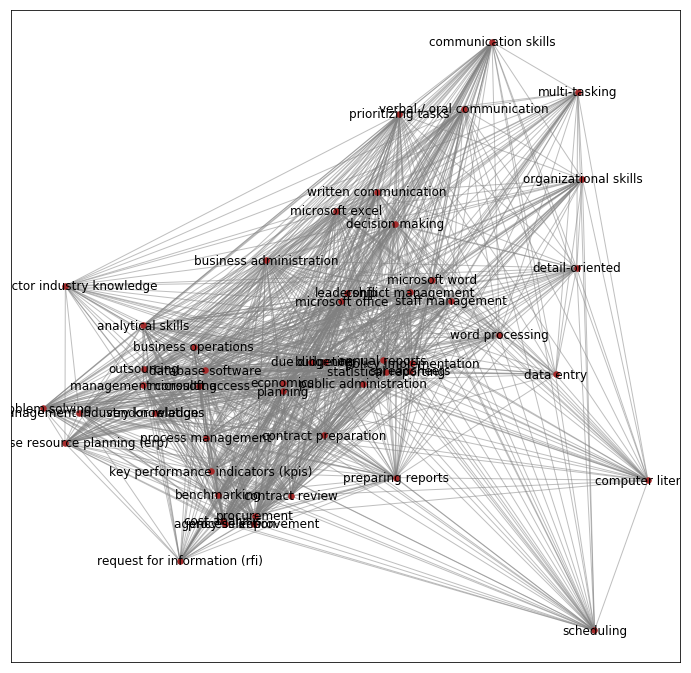

In [58]:
#pos = nx.spring_layout(G, iterations= 100)
fig, ax = plt.subplots(figsize = (12,12))
list_nodes = [nodes for nodes in partition.keys()
                            if partition[nodes] == 3 and nodes in list(G.nodes) and nodes in list(gsd[3].keys())[:50]]
edgelist = [edges for edges in list(G.edges())
                            if partition[edges[0]] == 3 and partition[edges[1]] == 3
                            and edges[0] in list_nodes and edges[1] in list_nodes]
nx.draw_networkx_nodes(G, pos,list_nodes, node_size = 30, node_color = colors[3])
nx.draw_networkx_labels(G,pos, {n: n for n in list_nodes}, font_size=12)
nx.draw_networkx_edges(G, pos, edgelist, alpha=0.5, edge_color='grey')

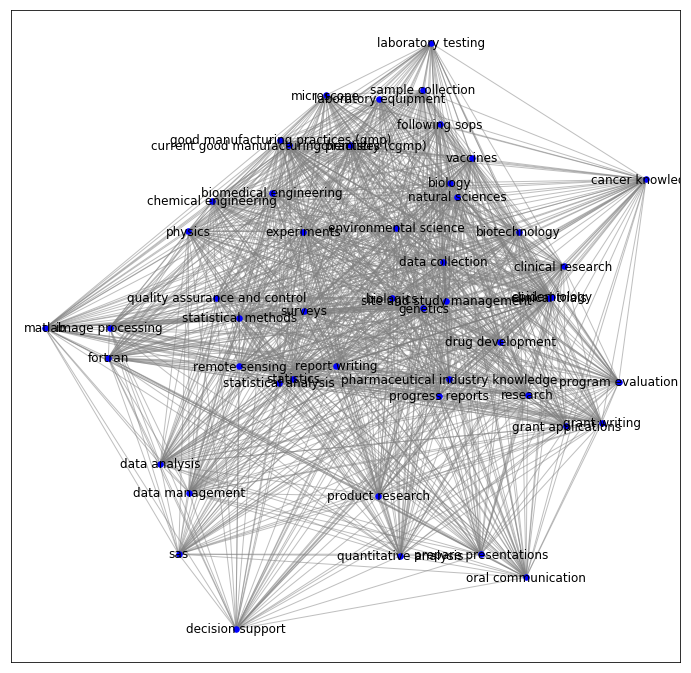

In [59]:
pos = nx.spring_layout(G, iterations= 100)
fig, ax = plt.subplots(figsize = (12,12))
list_nodes = [nodes for nodes in partition.keys()
                            if partition[nodes] == 4 and nodes in list(G.nodes) and nodes in list(gsd[4].keys())[:50]]
edgelist = [edges for edges in list(G.edges())
                            if partition[edges[0]] == 4 and partition[edges[1]] == 4
                            and edges[0] in list_nodes and edges[1] in list_nodes]
nx.draw_networkx_nodes(G, pos,list_nodes, node_size = 30, node_color = colors[4])
nx.draw_networkx_labels(G,pos, {n: n for n in list_nodes}, font_size=12)
nx.draw_networkx_edges(G, pos, edgelist, alpha=0.5, edge_color='grey')

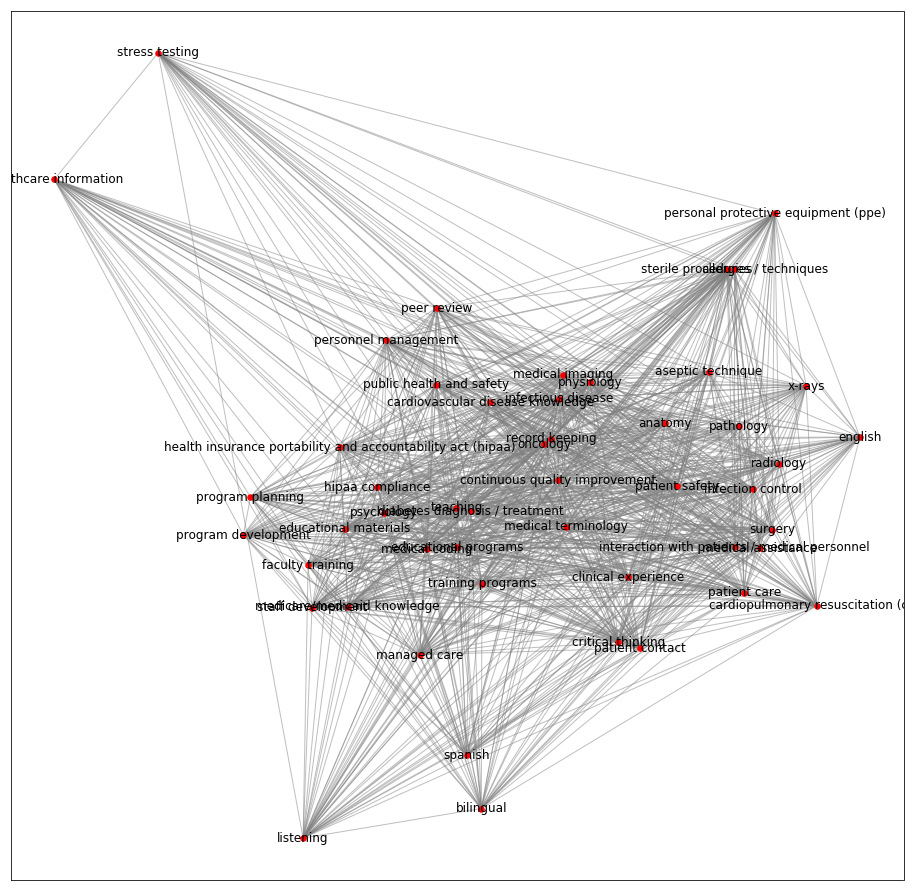

In [60]:
pos = nx.spring_layout(G, iterations= 100)
fig, ax = plt.subplots(figsize = (16,16))
list_nodes = [nodes for nodes in partition.keys()
                            if partition[nodes] == 5 and nodes in list(G.nodes) and nodes in list(gsd[5].keys())[:50]]
edgelist = [edges for edges in list(G.edges())
                            if partition[edges[0]] == 5 and partition[edges[1]] == 5
                            and edges[0] in list_nodes and edges[1] in list_nodes]
nx.draw_networkx_nodes(G, pos,list_nodes, node_size = 30, node_color = colors[5])
nx.draw_networkx_labels(G,pos, {n: n for n in list_nodes}, font_size=12)
nx.draw_networkx_edges(G, pos, edgelist, alpha=0.5, edge_color='grey')